In [173]:
# パラメータ定義
from traitlets.config.loader import FileConfigLoader
import glob
import numpy as np
import matplotlib.pyplot as plt

charges1 = []
chargesnoise = []
charges_subtracted = []
h = []
pede_list = []

filename = "7_85deg_3mm"
num = "_1"
s0 = 7590
d0 = 5515
t0 = 36
peak = 195


outname = filename + num + ".png"
outname_subtracted = filename + num + "_subtracted"
# color = "green"
# color = "blue"
# color = "cyan"
# color = "skyblue"
# color = "cornflowerblue"
color = "darkturquoise"
# color = 'salmon'


noisefile = "8_noise_2"
sn = 6487
dn = 5696
tn = 66
noise_peak = 305

# noisefile = "4_noise"
# noisefile2 = "4_noise_90deg"
# noisefile3 = "5_90deg_6mm"
# sn = 4878+3025+2556
# dn = 2990+1902+1527
# tn = 60+45+33.5
# noise_peak = 118

In [174]:
# fileのglob

#sr直付け
filelist1 = glob.glob("./data/" + filename + "/*")
#noise
noiselist = glob.glob("./data/" + noisefile + "/*")
# noiselist2 = glob.glob(noisefile2 + "/*")
# noiselist3 = glob.glob(noisefile3 + "/*")

In [175]:
# 電荷の計算、リストの作成
def add1(list):
  count=0
  for file in list:
    count += 1

    data = np.loadtxt(file)

    time = data[:,0]
    ch1 = data[:,1]
    ch2 = data[:,2]

    time_cut = time[0: 1000]
    ch1_cut = ch1[0: 1000]
    ch2_cut = ch2[0: 1000]

    ch1_pede = ch1[0:400]
    ch1_pede2 = ch1[600:1000]
    
    deltaT = time_cut[1]-time_cut[0]
    pede = -sum(ch1_pede)*deltaT*1e-3*1e-5*1e-3/50
    pede_sum = pede 
    charge_all = -sum(ch1_cut)*deltaT*1e-3*1e-5*1e-3/50
    charge = charge_all - pede_sum*10/4

    charges1.append(charge*1e12) #10??

    # # if(charge*1e12 > 79 and charge*1e12 < 80 ):
    # plt.scatter(time, ch1)
    # plt.grid()
    # # plt.ylim(-60,60)
    # # plt.xlim(-0.50,0.25)
    # plt.show()
    # # # # print(charge)





  print(count)

def addnoise(list):
  count=0
  for file in list:
    count += 1

    data = np.loadtxt(file)

    time = data[:,0]
    ch1 = data[:,1]
    ch2 = data[:,2]

    time_cut = time[0: 1000]
    ch1_cut = ch1[0: 1000]
    ch2_cut = ch2[0: 1000]

    ch1_pede = ch1[0:400]
    
    deltaT = time_cut[1]-time_cut[0]
    pede = -sum(ch1_pede)*deltaT*1e-3*1e-5*1e-3/50
    pede_sum = pede 
    charge_all = -sum(ch1_cut)*deltaT*1e-3*1e-5*1e-3/50
    charge = charge_all - pede_sum*10/4

    chargesnoise.append(charge*1e12) #10??

    # # if(charge*1e12 > 79 and charge*1e12 < 80 ):
    # plt.scatter(time, ch1)
    # plt.grid()
    # # plt.ylim(-60,60)
    # # plt.xlim(-0.50,0.25)
    # plt.show()
    # # # # print(charge)

  print(count)

add1(filelist1)
addnoise(noiselist)
# addnoise(noiselist2)
# addnoise(noiselist3)

5515
5696


In [176]:
# under800 = max([x for x in charges1 if x <= 800])
# print(under800)

In [177]:
hist1, bin_edges = np.histogram(charges1, bins=100, range = (0,750))
hist_noise, _ = np.histogram(chargesnoise, bins=bin_edges, range = (0,750))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

In [178]:
hist_subtracted = hist1*s0/d0*10/t0 -  hist_noise*sn/dn*10/tn

In [179]:
hist_subtracted2 = (hist1 - hist_noise*peak/noise_peak)*10/t0

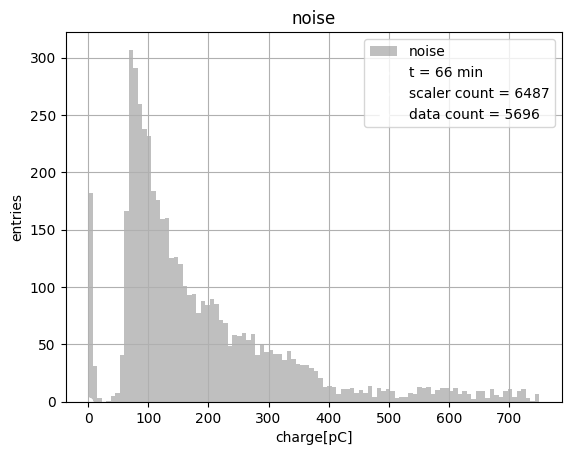

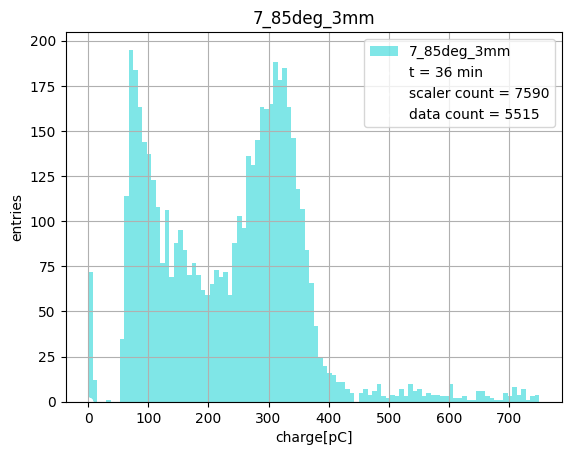

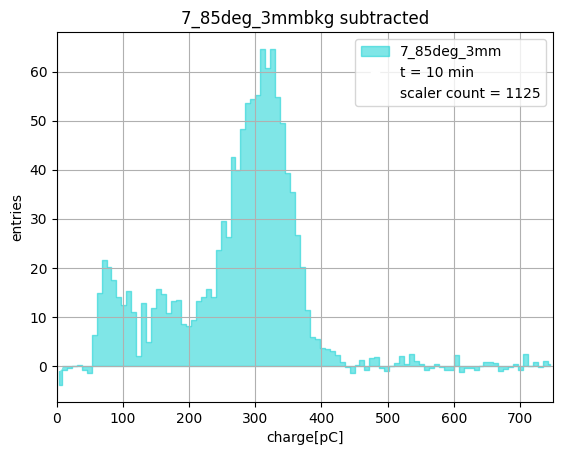

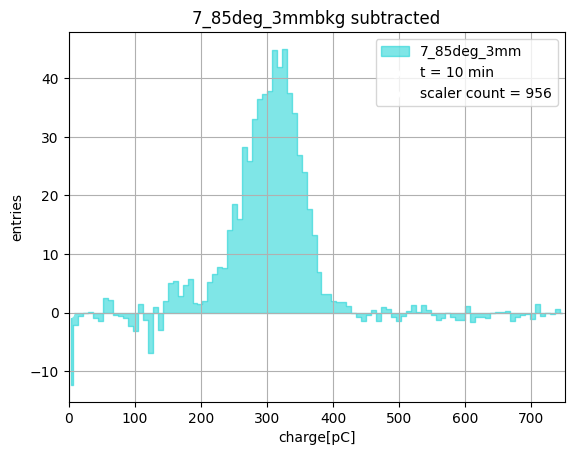

In [180]:
nbin = 100

plt.hist(chargesnoise, bins=nbin, range=(0, 750), alpha=0.5, color='gray', label = "noise")
plt.scatter(0,0, color = 'white', label = f"t = {tn:.0f} min")
plt.scatter(0,0, color = 'white', label = f"scaler count = {sn:.0f}")
plt.scatter(0,0, color = 'white', label = f"data count = {dn:.0f}")
plt.title("noise")
plt.xlabel("charge[pC]")
plt.ylabel("entries")
plt.grid()
plt.legend()
# plt.savefig(noisefile + "_2.png")
plt.show()

plt.hist(charges1, bins=nbin, range=(0, 750), alpha=0.5, color=color, label = filename)
plt.scatter(0,0, color = 'white', label = f"t = {t0:.0f} min")
plt.scatter(0,0, color = 'white', label = f"scaler count = {s0:.0f}")
plt.scatter(0,0, color = 'white', label = f"data count = {d0:.0f}")
plt.title(filename)
plt.xlabel("charge[pC]")
plt.ylabel("entries")
plt.grid()
plt.legend()
# plt.savefig(outname)
plt.show()

# plt.step(bin_centers, hist_subtracted, where='mid', label='filename')
plt.fill_between(bin_centers, hist_subtracted, step='mid', alpha=0.5, color=color, label=filename)
plt.scatter(0,0, color = 'white', label = "t = 10 min")
plt.scatter(0,0, color = 'white', label = f"scaler count = {s0/t0*10 - sn/tn*10:.0f}")
plt.title(filename + "bkg subtracted")
plt.xlabel("charge[pC]")
plt.ylabel("entries")
plt.grid()
plt.legend()
plt.xlim(0,750)
# plt.ylim(bottom = 0)
# plt.savefig(outname_subtracted + ".png")
plt.show()

plt.fill_between(bin_centers, hist_subtracted2, step='mid', alpha=0.5, color=color, label=filename)
plt.scatter(0,0, color = 'white', label = "t = 10 min")
plt.scatter(0,0, color = 'white', label = f"scaler count = {(s0-sn*peak/noise_peak)*10/t0:.0f}")
plt.title(filename + "bkg subtracted")
plt.xlabel("charge[pC]")
plt.ylabel("entries")
plt.grid()
plt.legend()
plt.xlim(0,750)
# plt.ylim(bottom = -100)
# plt.savefig(outname_subtracted + "_2.png")
plt.show()

In [181]:
# print(bin_centers)
# print(hist_subtracted2)

data = np.column_stack((bin_centers, hist_subtracted2))
datname = "./dat/" + filename + ".dat"
np.savetxt(datname, data, fmt='%.6f', delimiter='\t')